## Pandas
* 데이터 조작 및 분석을 위한 파이썬 라이브러리
* 특히, 숫자 테이블 및 시계열 데이터 조작을 위한 데이터 구조 및 기능 제공
* Pandas API reference Document https://pandas.pydata.org/docs/reference/index.html#api

In [2]:
# pandas 사용하겠다 그리고 이름은 pd로 쓰겠다라는 의미 입니다.
import pandas as pd
import numpy as np

### Pandas 데이터 구조
* 1D 데이터를 위한 Series:: pd.Series(array, index)
* 2D 데이터를 위한 DataFrame:: pd.DataFrame(data, index, columns, dtype, copy)
* 3D 데이터를 위한 Panel:: pd.Panel(data, items, major_axis, minor_axis, dtype, copy)

가 있지만, 주로 DataFrame을 사용하기 때문에, DataFrame만 실습을 진행하겠습니다.

### Pandas DataFrame 생성 및 속성
* dataFrame = pd.DataFrame(data, index, columns, dtype, copy)
* dataFrame = pd.DataFrame(dictionary)
* dataFrame.index :: daraFrame의 인덱스(row labels)
* dataFrame.columns :: dataFrame의 컬럼(column labels)
* dataFrame.values ::dataFrame의 values를 ndarray로 반환
* dataFrame.size :: dataFrame에 들어있는 데이터의 개수 반환
* dataFrame.shape :: dataFrame의 shape을 반환

In [2]:
## DataFrame은 2차원 구조로 쉽게 생각하시면 테이블처럼 되어있습니다.

## DataFrame 생성 방법 1
# 임의의 데이터로 진행하겠습니다. np.random.rand()로 데이터 생성해주세요.
data = np.random.rand(3, 5)
# 행의 이름입니다.
index = ["A", "B", "C"]
# 열의 이름입니다.
columns=['a', 'b', 'c', 'd', 'e']

# DataFrame 생성입니다.
dataFrame = pd.DataFrame(data=data, index=index, columns=columns)

dataFrame

,a,b,c,d,e
A,0.205327,0.968777,0.864392,0.053269,0.455492
B,0.332639,0.499903,0.455167,0.639392,0.033549
C,0.801085,0.064106,0.661033,0.461232,0.641786


In [3]:
## DataFrame 생성 방법 2

'''
딕셔너리(dictionary)는 key:values로 이루어지는 자료구조 입니다.
딕셔너리에 key값을 입력하면 key에 맞는 values가 반환되는 구조입니다.
ex) values = dictionary[key]
'''
# 임의의 딕셔너리를 생성해주세요.
temp_dic = {
    '년' : [1992, 1994, 1998, 2000],
    '월' : [3, 7, 9, 12],
    '일' : [17, 6, 3, 27],
    '시' : [16, 12, 1, 8],
    '분' : [30, 20, 10, 5]
}

# 생성한 딕셔너리를 사용해 DataFrame을 생성합니다.
# key 값은 columns가 되고 values는 각 columns의 데이터가 됩니다.
# index는 따로 설정해주셔야합니다. default값은 0부터 시작합니다.
dataFrame = pd.DataFrame(temp_dic, index=['A', 'B', 'C', 'D'])
dataFrame

,년,월,일,시,분
A,1992,3,17,16,30
B,1994,7,6,12,20
C,1998,9,3,1,10
D,2000,12,27,8,5


In [4]:
# index가 default로 설정된 DataFrame입니다.
dataFrame = pd.DataFrame(temp_dic)
dataFrame

,년,월,일,시,분
0,1992,3,17,16,30
1,1994,7,6,12,20
2,1998,9,3,1,10
3,2000,12,27,8,5


### Pandas Data 불러오기 및 저장하기
* 불러오기: pd.read_csv(file_path), .read_html(), .read_json(), ...
* 저장하기: dataFrame.to_csv(file_path), .to_html(), .to_json(), ....

In [5]:
# Pandas는 자주 사용되는 .csv파일, .json파일, .excel파일 등을 바로 읽어
# DataFrame으로 만들어 줍니다.

# 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte
# 이라면서 Error가 나실겁니다.
#dataFrame = pd.read_csv('../data/기온.csv')
# 윗줄 주석처리하고 다시 실행해 주세요

In [6]:
# encoding을 변경해 줍니다.
# 그래도 Error tokenizing data. C error: Expected 1 fields in line 8, saw 5
# 라면서 Error가 나실겁니다.
#dataFrame = pd.read_csv('../data/기온.csv', encoding='cp949')
# 윗줄 주석처리하고 다시 실행해 주세요

In [7]:
# Pandas로 쉽게 파일을 읽어올 수 있는 대신 포맷을 정확하게 지켜야합니다.
# data폴더의 기온.csv 파일을 열어서 1~7번줄을 지우시고,
# 8번부터 끝까지를 위로 올려줍니다.
# ctrl+s 눌르시고 예를 눌러주세요.
# 그다음 X 눌러서 파일 닫으시고, 이때는 저장 안 함을 눌러주세요.
# 그런 다음 다시 실행해 보겠습니다.
dataFrame = pd.read_csv('../data/기온.csv', encoding='cp949')
dataFrame

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1990-01-01,192,-0.5,-6.2,8.7
1,1990-01-02,192,-0.2,-4.8,5.4
2,1990-01-03,192,-0.5,-4.5,3.8
3,1990-01-04,192,-2.9,-10.0,7.1
4,1990-01-05,192,-0.5,-7.9,8.6
...,...,...,...,...,...
10952,2019-12-27,192,2.2,-3.6,7.8
10953,2019-12-28,192,-0.6,-7.1,8.2
10954,2019-12-29,192,1.4,-4.9,5.4
10955,2019-12-30,192,6.0,2.7,11.1


In [8]:
# dataFrame의 정보를 가지고 있는 속성들입니다.
# 한번씩 출력하셔서 어떤 값이 나오는지
# 위 dataFrame과 비교하면서 확인해 주세요.
print('dataFrame.index:: ', dataFrame.index)
print('''----------------------------------------------------------------------------------''')
print('dataFrame.columns:: ', dataFrame.columns)
print('''----------------------------------------------------------------------------------''')
print('dataFrame.values:: ', dataFrame.values)
print('''----------------------------------------------------------------------------------''')
print('dataFrame.size:: ', dataFrame.size)
print('''----------------------------------------------------------------------------------''')
print('dataFrame.shape:: ', dataFrame.shape)

dataFrame.index::  RangeIndex(start=0, stop=10957, step=1)
----------------------------------------------------------------------------------
dataFrame.columns::  Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
----------------------------------------------------------------------------------
dataFrame.values::  [['1990-01-01' 192 -0.5 -6.2 8.7]
 ['1990-01-02' 192 -0.2 -4.8 5.4]
 ['1990-01-03' 192 -0.5 -4.5 3.8]
 ...
 ['2019-12-29' 192 1.4 -4.9 5.4]
 ['2019-12-30' 192 6.0 2.7 11.1]
 ['2019-12-31' 192 -1.1 -6.4 3.5]]
----------------------------------------------------------------------------------
dataFrame.size::  54785
----------------------------------------------------------------------------------
dataFrame.shape::  (10957, 5)


### Pandas DataFrame 조작하기
#### 데이터 선택, 추가, 삭제 하기
* df[column_name] :: column_name에 해당하는 column을 반환
* df[[column_names]] :: column_name에 해당하는 다수의 columns를 반환
* df.loc[index_name] :: index_name에 해당하는 row를 반환
* df.iloc[integer index] :: 정수 index에 해당하는 row를 반환
* df[start:end] :: start부터 end까지의 모든 데이터를 반환


* df[new_column_name] = pd.Series([new data], index) :: 기존 DataFrame에 new_column_name의 column을 생성하고 데이터를 index에 맞춰 입력
* df.append(pd.DataFrame(data), new_index) :: 기존 DataFrame에 새로운 row를 생성


* del df[column_name] :: DataFrame에서 column_name에 해당하는 column 제거
* df = df.drop(index_name) :: DataFrame에서 index_name에 해당하는 row 제거

In [9]:
# DataFrame에서 특정 행 혹은 특정 열의 데이터를 선택하는 방법 입니다.
# DataFrame 새로 생성할게요.
dataFrame = pd.read_csv('../data/기온.csv', encoding='cp949')

# dataFrame에 어떤 컬럼이 있는지 먼저 확인합니다.
columns = dataFrame.columns
print(columns)

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')


In [10]:
# 먼저 특정 열의 데이터만 가져와볼게요.
# dataFrame에서 최저기온 데이터만 가져와볼게요.
# 위 컬럼 출력한거에서 이름 복사해서 붙여넣어 주세요.
최저기온 = dataFrame[ '최저기온(℃)' ]
print(최저기온)
print('''----------------------------------------------------------------------------------''')

# dataFrame에서 날짜와 최저기온 한번에 맞이 가져와볼게요.
# 두개 이상을 한번에 가져 오실때는 컬럼의 이름을 list로 만들어서 넣어주세요.
날짜_최저기온 = dataFrame[ ['날짜', '최저기온(℃)'] ]
print(날짜_최저기온)
print('''----------------------------------------------------------------------------------''')

# 물론 위 셀에서 만든 columns 변수로도 가능합니다.
날짜_최저 = dataFrame[[columns[0], columns[4]]]
print(날짜_최저)

0        -6.2
1        -4.8
2        -4.5
3       -10.0
4        -7.9
         ... 
10952    -3.6
10953    -7.1
10954    -4.9
10955     2.7
10956    -6.4
Name: 최저기온(℃), Length: 10957, dtype: float64
----------------------------------------------------------------------------------
               날짜  최저기온(℃)
0      1990-01-01     -6.2
1      1990-01-02     -4.8
2      1990-01-03     -4.5
3      1990-01-04    -10.0
4      1990-01-05     -7.9
...           ...      ...
10952  2019-12-27     -3.6
10953  2019-12-28     -7.1
10954  2019-12-29     -4.9
10955  2019-12-30      2.7
10956  2019-12-31     -6.4

[10957 rows x 2 columns]
----------------------------------------------------------------------------------
               날짜  최고기온(℃)
0      1990-01-01      8.7
1      1990-01-02      5.4
2      1990-01-03      3.8
3      1990-01-04      7.1
4      1990-01-05      8.6
...           ...      ...
10952  2019-12-27      7.8
10953  2019-12-28      8.2
10954  2019-12-29      5.4
10955  2019-12-

In [11]:
# 이제 특정 행의 데이터만 가져와 볼게요.
# dataFrame 새로 만들게요.
data = np.random.rand(3, 5)
index = ["A", "B", "C"]
columns=['a', 'b', 'c', 'd', 'e']

dataFrame = pd.DataFrame(data=data, index=index, columns=columns)

# dataFrame이랑 index를 한번 출력해 볼게요.
print(dataFrame)
print(dataFrame.index)

          a         b         c         d         e
A  0.255415  0.215926  0.286123  0.202316  0.363262
B  0.666865  0.285592  0.113860  0.279131  0.194175
C  0.518894  0.660850  0.645698  0.030279  0.423994
Index(['A', 'B', 'C'], dtype='object')


In [12]:
# 먼저 index의 이름으로 dataFrame의 특정 행의 데이터를 가져오는 방법이에요.
# dataFrame.loc[index_name]을 사용해 가져오시면 됩니다.
# 위에 출력한 dataFrame이랑 비교해서 결과 한번 확인해 주세요.
print("index = A: \n", dataFrame.loc['A'], '\n')
print("index = C: \n", dataFrame.loc['C'])
print('''----------------------------------------------------------------------------------''')

# 다음은 index의 번호를 사용해서 특정 행의 데이터를 가져오는 방법입니다.
# dataFrame.iloc[index]를 사용해 가져오시면 되요. index번호는 default를 따릅니다.
# 위에 출력한 dataFrame이랑 비교해서 결과 한번 확인해 주세요.
print("index = 1 (B): \n", dataFrame.iloc[1], '\n')
print("index = 2 (C): \n", dataFrame.iloc[2])

index = A: 
 a    0.255415
b    0.215926
c    0.286123
d    0.202316
e    0.363262
Name: A, dtype: float64 

index = C: 
 a    0.518894
b    0.660850
c    0.645698
d    0.030279
e    0.423994
Name: C, dtype: float64
----------------------------------------------------------------------------------
index = 1 (B): 
 a    0.666865
b    0.285592
c    0.113860
d    0.279131
e    0.194175
Name: B, dtype: float64 

index = 2 (C): 
 a    0.518894
b    0.660850
c    0.645698
d    0.030279
e    0.423994
Name: C, dtype: float64


In [13]:
# DataFrame에서 index 번호를 사용해서 몇 번부터 몇 번까지를 한번에 가지고 올 수도 있어요.
bc_dataFrame = dataFrame[1:3]
print(bc_dataFrame)

          a         b         c         d         e
B  0.666865  0.285592  0.113860  0.279131  0.194175
C  0.518894  0.660850  0.645698  0.030279  0.423994


In [14]:
# 다음은 기존의 DataFrame에 새로운 열을 추가하는 방법이에요.
# 딕셔너리에 새로운 값을 추가하는거랑 비슷하게 진행됩니다.
# dataFrame['new_column_name'] = pd.Series([new_data], index) 를 진행해 주시면 되요.
# pd.Series()는 dataFrame에서 하나의 열과 동일한거에요.

# dataFrame 새로 만들게요.
data = np.random.rand(3, 5)
index = ["A", "B", "C"]
columns=['a', 'b', 'c', 'd', 'e']
dataFrame = pd.DataFrame(data=data, index=index, columns=columns)

# 먼저 기존의 dataFrame 출력해볼께요.
print(dataFrame)
print('''----------------------------------------------------------------------------------''')
# 새로운 컬럼 추가해 볼게요.
# 데이터는 index이름을 따라가요, index를 입력안하면 값이 들어가지 않아요.
data = np.arange(1, 4)

# 1. index 입력안할시 컬럼은 생성되지만 data는 들어가지 않고 NaN값이 들어가요.
dataFrame['f'] = pd.Series(data=data)
# dataFrame 다시 출력해볼께요. 
print(dataFrame)

print('''----------------------------------------------------------------------------------''')
# 2. index 입력하시면 값이 들어가는걸 보실 수 있어요.
dataFrame['f'] = pd.Series(data=data, index=['A', 'B', 'C'])
# dataFrame 다시 출력해볼께요. 
print(dataFrame)

print('''----------------------------------------------------------------------------------''')
# 3. index 순서를 바꿔볼게요. 데이터가 index에 맞춰서 들어가는걸 보실 수 있어요.
dataFrame['f'] = pd.Series(data=data, index=['B', 'C', 'A'])
# dataFrame 다시 출력해볼께요. 
print(dataFrame)

          a         b         c         d         e
A  0.561353  0.387950  0.266412  0.090057  0.097532
B  0.666233  0.921081  0.150223  0.702193  0.430853
C  0.412591  0.981834  0.794676  0.667026  0.731089
----------------------------------------------------------------------------------
          a         b         c         d         e   f
A  0.561353  0.387950  0.266412  0.090057  0.097532 NaN
B  0.666233  0.921081  0.150223  0.702193  0.430853 NaN
C  0.412591  0.981834  0.794676  0.667026  0.731089 NaN
----------------------------------------------------------------------------------
          a         b         c         d         e  f
A  0.561353  0.387950  0.266412  0.090057  0.097532  1
B  0.666233  0.921081  0.150223  0.702193  0.430853  2
C  0.412591  0.981834  0.794676  0.667026  0.731089  3
----------------------------------------------------------------------------------
          a         b         c         d         e  f
A  0.561353  0.387950  0.266412  0.090057  0

In [15]:
# 다음은 기존의 DataFrame에 새로운 행을 추가하는 방법이에요.
# 열은 Series이지만, 행은 DataFrame으로 취급되요.
# 그래서 이번에는 DataFrame을 새로 만들어서 추가할게요.
# 추가하는 방법은 dataFrame.append(new_DataFrame) 을 사용하시면 되요.

# dataFrame 새로 만들게요.
data = np.random.rand(3, 5)
index = ["A", "B", "C"]
columns=['a', 'b', 'c', 'd', 'e']
dataFrame = pd.DataFrame(data=data, index=index, columns=columns)

# 기존의 DataFrame 출력해볼게요.
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# 새로 한줄짜리 DataFrame 생성할게요.
# DataFrame은 2차원 구조기 때문에 data를 2차원으로 바꿀게요.
data = np.arange(1, len(columns)+1).reshape(1, 5)
new_dataFrame = pd.DataFrame(data, columns=columns)

# 새로만든 DataFrame 출력해볼게요.
print(new_dataFrame)
print('''----------------------------------------------------------------------------------''')

# 두 DataFrame 합쳐볼게요. 이부분은 list.append()랑 비슷해요.
df = dataFrame.append(new_dataFrame)
print(df)

          a         b         c         d         e
A  0.395657  0.482094  0.042641  0.721160  0.430013
B  0.479955  0.909983  0.347394  0.030069  0.277353
C  0.877459  0.818326  0.859991  0.354429  0.963080
----------------------------------------------------------------------------------
   a  b  c  d  e
0  1  2  3  4  5
----------------------------------------------------------------------------------
          a         b         c         d         e
A  0.395657  0.482094  0.042641  0.721160  0.430013
B  0.479955  0.909983  0.347394  0.030069  0.277353
C  0.877459  0.818326  0.859991  0.354429  0.963080
0  1.000000  2.000000  3.000000  4.000000  5.000000


In [16]:
# 다음은 기존의 DataFrame에 행이랑 열을 제거하는 방법이에요.

# dataFrame 새로 만들게요.
data = np.random.rand(3, 5)
index = ["A", "B", "C"]
columns=['a', 'b', 'c', 'd', 'e']
dataFrame = pd.DataFrame(data=data, index=index, columns=columns)

# 기존의 DataFrame 출력해볼게요.
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# 열을 제거하는 방법은 del dataFrame[column_name] 이에요.
# d열을 지우고 출력해볼게요.
del dataFrame['d']
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# 행을 제거하는 방법은 dataFrame.drop(index_name) 이에요.
# B행을 지우고 출력해볼게요.
dataFrame.drop('B')
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# dataFrame.drop()은 바로 지우는게 아니라, 지워진 DataFrame을 반환하는 함수에요.
# 따라서 다음과 같이 진행을 해야해요.
dataFrame = dataFrame.drop('B')
print(dataFrame)

          a         b         c         d         e
A  0.282658  0.310178  0.791393  0.731640  0.381382
B  0.535237  0.507260  0.657915  0.223022  0.380165
C  0.554703  0.096293  0.744321  0.364722  0.489603
----------------------------------------------------------------------------------
          a         b         c         e
A  0.282658  0.310178  0.791393  0.381382
B  0.535237  0.507260  0.657915  0.380165
C  0.554703  0.096293  0.744321  0.489603
----------------------------------------------------------------------------------
          a         b         c         e
A  0.282658  0.310178  0.791393  0.381382
B  0.535237  0.507260  0.657915  0.380165
C  0.554703  0.096293  0.744321  0.489603
----------------------------------------------------------------------------------
          a         b         c         e
A  0.282658  0.310178  0.791393  0.381382
C  0.554703  0.096293  0.744321  0.489603


### Pandas DataFrame 조작하기
#### Simple Statistics
* df.sum() :: DataFrame 또는 Series 축에 대해 합계 반환
* df.mean() :: DataFrame 또는 Series 축에 대해 평균 반환
* df.median() :: DataFrame 또는 Series 축에 대해 중앙값 반환
* df.mode() :: DataFrame 또는 Series 축에 대해 최빈값를 반환
* df.std() :: DataFrame 또는 Series 축에 대해 표준 편차 반환
* df.min() :: DataFrame 또는 Series 축에 대해 최소값 반환
* df.max() :: DataFrame 또는 Series 축에 대해 최대값 반환
* df.cumsum() :: DataFrame 또는 Series 축에 대해 누적 합계 반환
* df.describe() :: 전체적인 통계 반환

In [17]:
# DataFrame은 DataFrame 내부의 데이터로 계산을 진행할 수 있어요.
# 한번 쭉 실행해보고 넘어가실게요.
np.random.seed(1)
data = np.arange(20).reshape(4, 5)
df = pd.DataFrame(data)
print('초기 DataFrame: \n', df)
print('''----------------------------------------------------------------------------------''')

print('sum(axis=0): \n', df.sum(axis=0))
print('''----------------------------------------------------------------------------------''')

# DataFrame의 데이터를 가지고 계산을 진행한 결과를 
# 동일 DataFrame의 뒤쪽에 추가도 가능해요.
# 이부분은 DataFrame의 데이터들을 축에 맞춰 더해서 
# 새로운 행을 추가하는 부분이에요.
df = df.append(pd.DataFrame([df.sum(axis=0)], index=['sum_ax0']))
print('append(sum(axis=0)): \n', df)
print('''----------------------------------------------------------------------------------''')

print('sum(axis=1): \n', df.sum(axis=1))
print('''----------------------------------------------------------------------------------''')

# 이부분은 DataFrame의 데이터들을 축에 맞춰 더해서 
# 새로운 열을 추가하는 부분이에요.
df['sum_ax1'] = df.sum(axis=1)
print('df[new_column]=sum(axis=1): \n', df)
print('''----------------------------------------------------------------------------------''')


# indexing과 slicing을 사용해서 원하는 지점의 값을로만
# 계산을 진행할 수도 있어요.
print('df[0][:4].sum(): \n', df[0][:4].sum())
print('''----------------------------------------------------------------------------------''')
print('df.iloc[0, :5].sum(): \n', df.iloc[0, :5].sum())
print('''----------------------------------------------------------------------------------''')

print(df.cumsum())
print('''----------------------------------------------------------------------------------''')

print(df.mode())
print('''----------------------------------------------------------------------------------''')

print(df.describe())

초기 DataFrame: 
     0   1   2   3   4
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
----------------------------------------------------------------------------------
sum(axis=0): 
 0    30
1    34
2    38
3    42
4    46
dtype: int64
----------------------------------------------------------------------------------
append(sum(axis=0)): 
           0   1   2   3   4
0         0   1   2   3   4
1         5   6   7   8   9
2        10  11  12  13  14
3        15  16  17  18  19
sum_ax0  30  34  38  42  46
----------------------------------------------------------------------------------
sum(axis=1): 
 0           10
1           35
2           60
3           85
sum_ax0    190
dtype: int64
----------------------------------------------------------------------------------
df[new_column]=sum(axis=1): 
           0   1   2   3   4  sum_ax1
0         0   1   2   3   4       10
1         5   6   7   8   9       35
2        10  11  12  13  14       60
3 

### Pandas DataFrame 조작하기
#### Other Functions

* df.fillna(arg) :: 데이터에 포함된 모든 NaN을 arg로 변경
* df.dropna() :: NaN이 포함된 row 제거


* df.groupby(key) :: key를 통해 DataFrame을 그룹화된 Object 생성
* df.groupby(key).groups[key_value] :: key로 그룹화된 Object에서 key_value가 포함된 row만 선택해 반환

In [18]:
# 나머지 기능들 중에 자주 사용하는 4가지만 더 진행할게요.
# dataFrame 새로 생성할게요.
data = np.arange(20).reshape(4, 5)
dataFrame = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
print('초기 DataFrame: \n', dataFrame)
print('''----------------------------------------------------------------------------------''')

# f열을 만들고 NaN으로 채울게요
dataFrame['f'] = float('nan')
# 확인한번 진행할게요.
print('f열', dataFrame)
print('''----------------------------------------------------------------------------------''')

# dataFrame.isnull()은 dataFrame에 NaN이 포함되었는지를 보여주는 함수에요.
print(dataFrame.isnull())
print('''----------------------------------------------------------------------------------''')

# dataFrame.fillna(arg)는 NaN을 전부 arg로 바꿔서 반환해주는 함수에요.
dataFrame = dataFrame.fillna(100)
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# g열을 만들고 NaN으로 채울게요
dataFrame['g'] = float('nan')
# 확인한번 진행할게요.
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# index [0, 2] 만 NaN을 다른 값으로 변경해줄게요.
dataFrame.iloc[0] = 100
dataFrame.iloc[2] = 100
print(dataFrame)
print('''----------------------------------------------------------------------------------''')

# dataFrame.dropna()는 NaN이 포함된 행을 지우고 반환해주는 함수에요.
# 1번 3번 행이 지워진걸 볼 수 있어요.
dataFrame = dataFrame.dropna()
print(dataFrame)

초기 DataFrame: 
     a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
----------------------------------------------------------------------------------
f열     a   b   c   d   e   f
0   0   1   2   3   4 NaN
1   5   6   7   8   9 NaN
2  10  11  12  13  14 NaN
3  15  16  17  18  19 NaN
----------------------------------------------------------------------------------
       a      b      c      d      e     f
0  False  False  False  False  False  True
1  False  False  False  False  False  True
2  False  False  False  False  False  True
3  False  False  False  False  False  True
----------------------------------------------------------------------------------
    a   b   c   d   e      f
0   0   1   2   3   4  100.0
1   5   6   7   8   9  100.0
2  10  11  12  13  14  100.0
3  15  16  17  18  19  100.0
----------------------------------------------------------------------------------
    a   b   c   d   e      f   g
0   0   1   2   

In [19]:
# 마지막으로 dataFrame에서 동일한 카테고리에 속하는 데이터들만
# 그룹으로 만드는 방법이에요.

# dataFrame 새로 생성할게요.
data = np.arange(20).reshape(4, 5)
dataFrame = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

# 위에서는 정석으로 했지만, 굳이 그럴 필요는 없어요.
dataFrame['Alpha'] = ['A', 'B', 'A', 'B']
print('초기 DataFrame: \n', dataFrame)
print('''----------------------------------------------------------------------------------''')

# 그룹으로 묶는 방법은 2번의 과정이 필요해요.
# 첫번째는 dataFrame.groupby(key)를 사용해서 그룹화된 Object를 생성하고
# dataFrame.groupby(key) 오브젝트에서 .groups[key_value]를 사용해
# key_value가 포함된 행만 선택하는 거에요.

# Alpha 열로 그룹화된 Object를 먼저 생성하고 출력해 볼게요.
# Object기 때문에 이상한게 나오실거에요.
grouped_obj = dataFrame.groupby('Alpha')
print(grouped_obj)
print('''----------------------------------------------------------------------------------''')

# 하지만 이미 그룹화된 Object기 때문에 key_value를 써서 해당 그룹만 가져올 수 있어요.
# Alpha의 값이 A인 그룹만 가져올게요. index = [0, 2] 이네요.
Alpha_A = grouped_obj.groups['A']
print(Alpha_A)
print('''----------------------------------------------------------------------------------''')

# Index를 반환하기 때문에 데이터로 보고싶으면 다음과 같이 해야되요.
print(dataFrame.iloc[Alpha_A])

# Pandas 실습은 이상이구요.
# 문제 한번 풀어보세요~

초기 DataFrame: 
     a   b   c   d   e Alpha
0   0   1   2   3   4     A
1   5   6   7   8   9     B
2  10  11  12  13  14     A
3  15  16  17  18  19     B
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
Int64Index([0, 2], dtype='int64')
----------------------------------------------------------------------------------
    a   b   c   d   e Alpha
0   0   1   2   3   4     A
2  10  11  12  13  14     A


## 문제
1. 다운 받은 장마_전국.csv 파일을 pandas로 읽어 DataFrame을 만들어보세요. hint:encoding
2. DataFrame에서 지점번호 column을 제거해보세요.
3. DataFrame에서 지점명이 몇 개인지 새어보세요.
4. 새로운 Dictionary를 생성해 지점명으로 해당 지점의 DataFrame을 찾을 수 있도록 만들어보세요.
5. 각 지역의 DataFrame의 끝에 장마일수 대비 평균강수량을 추가해보세요.
6. 각 지역의 DataFrame의 끝에 강수일수 대비 평균강수량을 추가해보세요.
7. Matplotlib을 사용해 각 지역의 강수일수 대비 평균강수량을 하나의 plot에 그려보세요.  

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


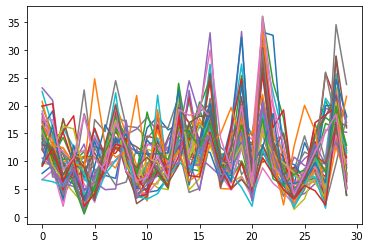

In [4]:
## plot을 그릴 matplotlib 라이브러리 import
from matplotlib import pyplot as plt

## 1. pandas.read_csv로 파일 읽어오기
df = pd.read_csv('../data/장마_전국.csv', encoding='cp949')

## 2. 지점 번호 제거
del df['지점번호']

## 3. dataFrame에서 .values로 모든 지점명 가져온 후
## set()을 통해 중복 제거 및 list로 타입 변경
spot_names = list(set(df['지점명'].values))
# print(len(spot_names))

## 4. Dictionary 생성
df_dict = {}

## 지점명을 돌면서 진행
## for spot_name in spot_names = for i in range(len(spot_names)): 와 동일
##                                    spot_name = spot_names[i]
for spot_name in spot_names:
    ## 지점명으로 그룹화된 오브젝트 생성과 동시에 해당 지점의 데이터만 가져와서
    ## Dictionary에 지점명으로 저장
    df_dict[spot_name] = df.iloc[df.groupby('지점명').groups[spot_name]]

## 5. Dictionary의 keys()=지점명 을 돌면서 진행
for s_name in df_dict.keys():
    ## 각 지점 DataFrame 가져오기
    spot_df = df_dict[s_name]
    ## 6. 평균 강수량은 전체강수량을 일수로 나누면 됩니다.
    spot_df['평균강수량(장마일수)'] = spot_df['합계강수량']/spot_df['장마일수']
    spot_df['평균강수량(강수일수)'] = spot_df['합계강수량']/spot_df['강수일수']

    ## 계산 후 Dictionary에 새로운 DataFrame 저장
    df_dict[s_name] = spot_df

# 7. plot 그리기
fig, ax = plt.subplots()

# 다시 지점명 돌면서 진행
# enumerate(): ()안의 데이터를 하나씩 반환하는 동시에 몇번째인지 함께 반환
for idx, spot_name in enumerate(df_dict.keys()):
    ## 각 지점 DataFrame 가져오기
    spot_df = df_dict[spot_name]
    
    ## 각 지점의 평균강수량 가져오기
    avg_rain = spot_df['평균강수량(장마일수)'].values
    
    ##  avg_rain의 개수 만큼 x 축생성.
    x = range(len(avg_rain))
    
    ## plot 에 데이터 추가
    ax.plot(x, avg_rain)
## plot show()
plt.show()